## **Autsim Prediction**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Dataset Size**

1.   train.csv 800 rows
2.   test.csv  200 rows

**Columns:**

*   ID - ID of the patient
*   A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
*   age - Age of the patient in years
*   gender - Gender of the patient
*   ethnicity - Ethnicity of the patient
*   jaundice - Whether the patient had jaundice at the time of birth
*   autism - Whether an immediate family member has been diagnosed with autism
*   contry_of_res - Country of residence of the patient
*   used_app_before - Whether the patient has undergone a screening test before
*   result - Score for AQ1-10 screening test
*   age_desc - Age of the patient
*   relation - Relation of patient who completed the test
*   Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.








## DATA PRE-PROCESSING

In [3]:
## Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
## Reading the data
train = pd.read_csv("/content/drive/MyDrive/CodeAlpha Internship Edeme/Autism/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/CodeAlpha Internship Edeme/Autism/data/test.csv")

In [56]:
## Checking the head of the data
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [57]:
## Checking the column names in the dataframe
train.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [58]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in train.columns if train[feature].dtypes == 'O']
num_cols = [feature for feature in train.columns if feature not in cat_cols]

In [59]:
## Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation']


In [60]:
## Finding the unique values in each of the categorical feature columns
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['f' 'm']


ethnicity:
Number of unique values in the ethnicity: 12
Unique values: ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['no' 'yes']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 56
Unique values: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan'

In [61]:
## Removing unnecessary columns
## Removing ID column since it doesn't provide any logical relation to the occurance of the disease
## Removing the age_desc column since it has only one value. In other words, the column has zero variance
train.drop(columns=['ID','age_desc'],axis=1,inplace=True)

In [62]:
## Checking the successful dropping of ID and age_desc columns
train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [63]:
## Some of the columns have ? symbol instead of the record
## Here we will just add such records into the Others category
## Columns -- ethnicity, relation
train['ethnicity'] = np.where(train['ethnicity'] == '?', 'Others',train['ethnicity'])
train['relation'] = np.where(train['relation'] == '?', 'Others', train['relation'])

In [64]:
## Checking for successful replacement of records with ?
for feature in ['ethnicity','relation']:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

ethnicity:
Number of unique values in the ethnicity: 11
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


relation:
Number of unique values in the relation: 5
Unique values: ['Self' 'Relative' 'Parent' 'Others' 'Health care professional']




In [65]:
## In the feature column ethnicity, there are two types of other columns : 1. Others 2. others
## Let's just merge those records into one category named Others
train['ethnicity']= np.where(train['ethnicity'] == 'others', 'Others', train['ethnicity'])

In [66]:
for feature in ['ethnicity']:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']




In [67]:
num_cols.remove('ID')
cat_cols.remove('age_desc')

In [68]:
for feature in cat_cols:
    print(f"{feature}:")
    print(f"Number of unique values in the {feature}: {train[feature].nunique()}")
    print(f"Unique values: {train[feature].unique()}")
    print('\n')

gender:
Number of unique values in the gender: 2
Unique values: ['f' 'm']


ethnicity:
Number of unique values in the ethnicity: 10
Unique values: ['Others' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Hispanic'
 'Asian' 'Turkish' 'South Asian' 'Latino']


jaundice:
Number of unique values in the jaundice: 2
Unique values: ['no' 'yes']


austim:
Number of unique values in the austim: 2
Unique values: ['no' 'yes']


contry_of_res:
Number of unique values in the contry_of_res: 56
Unique values: ['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Arge

In [69]:
## Checking for missing values in the dataset
train.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


**It seems there are no missing values in the dataset**




In [70]:
## Checking whether the data is unbalanced or not
train['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [71]:
639/(161+639)

0.79875

This means that almost 80% of the target values are of single category.

**The dataset seems to be unbalanced**

In [72]:
cat_cols

['gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'relation']

In [73]:
## Creating a copy of the original dataset before encoding (for visualization)
train_copy = train.copy()

In [74]:
## Since we already have over 15 independent feature, we will use ordinal encoding instead
## of the one-hot encoding on the categorical features
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=60, dtype=np.int64)

train[cat_cols] = oe.fit_transform(train[cat_cols])

In [75]:
for feature in cat_cols:
    print(f"Unique values in {feature}:")
    print(f"{train[feature].unique()}\n")

Unique values in gender:
[0 1]

Unique values in ethnicity:
[5 9 4 6 1 2 0 8 7 3]

Unique values in jaundice:
[0 1]

Unique values in austim:
[0 1]

Unique values in contry_of_res:
[ 7 25 54 46 31 53 13 36 15 32 52  6 51 27 21 33 55 19 35  0 39 29  1  9
 43 28  5 48 42 12  8  4 44 20 49 24 23  2 16 22 47 50 40 26  3 30 34 37
 45 18 38 41 17 11 14 10]

Unique values in used_app_before:
[0 1]

Unique values in relation:
[4 3 2 1 0]



In [76]:
train[cat_cols].head()

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation
0,0,5,0,0,7,0,4
1,1,5,0,0,25,0,4
2,1,9,0,1,54,0,4
3,0,5,0,0,54,0,4
4,1,5,0,0,46,0,4


In [77]:
## Our training data is ready
train.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,7,0,6.351166,4,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,25,0,2.255185,4,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,54,0,14.851484,4,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,54,0,2.276617,4,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,46,0,-4.777286,4,0


## Data Visualization

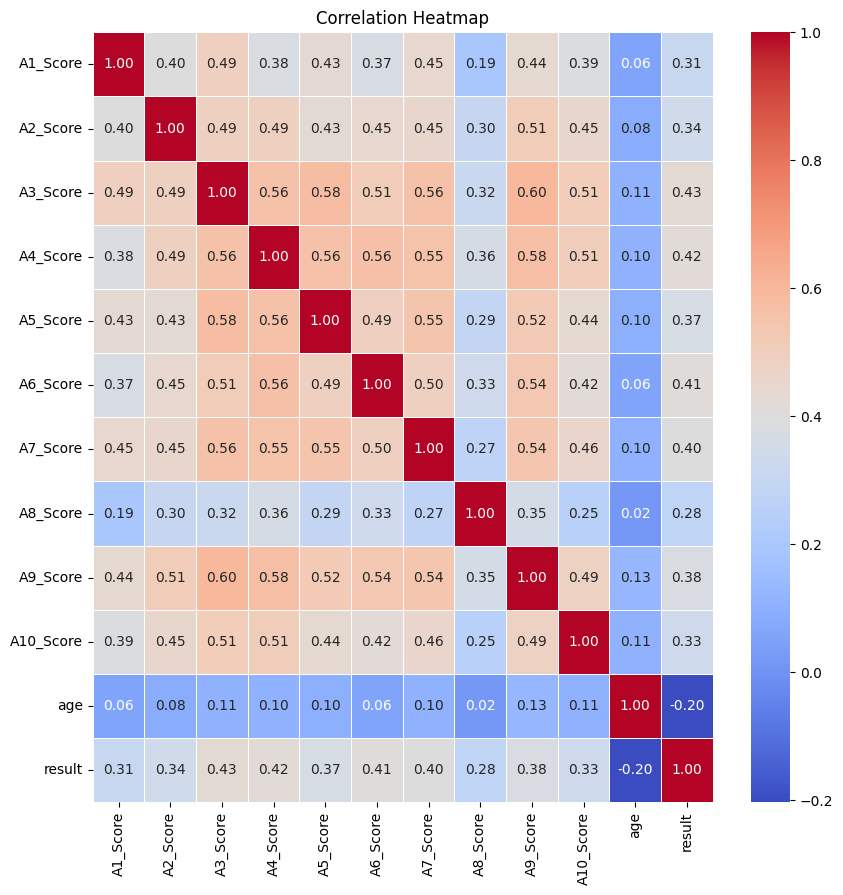

In [78]:
# Selecting numerical features for the heatmap
features_hm = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

# Calculate the correlation matrix
correlation_matrix = train[features_hm].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

array([[<Axes: title={'center': 'A1_Score'}>,
        <Axes: title={'center': 'A2_Score'}>,
        <Axes: title={'center': 'A3_Score'}>,
        <Axes: title={'center': 'A4_Score'}>],
       [<Axes: title={'center': 'A5_Score'}>,
        <Axes: title={'center': 'A6_Score'}>,
        <Axes: title={'center': 'A7_Score'}>,
        <Axes: title={'center': 'A8_Score'}>],
       [<Axes: title={'center': 'A9_Score'}>,
        <Axes: title={'center': 'A10_Score'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'ethnicity'}>,
        <Axes: title={'center': 'jaundice'}>,
        <Axes: title={'center': 'austim'}>,
        <Axes: title={'center': 'contry_of_res'}>],
       [<Axes: title={'center': 'used_app_before'}>,
        <Axes: title={'center': 'result'}>,
        <Axes: title={'center': 'relation'}>,
        <Axes: title={'center': 'Class/ASD'}>]], dtype=object)

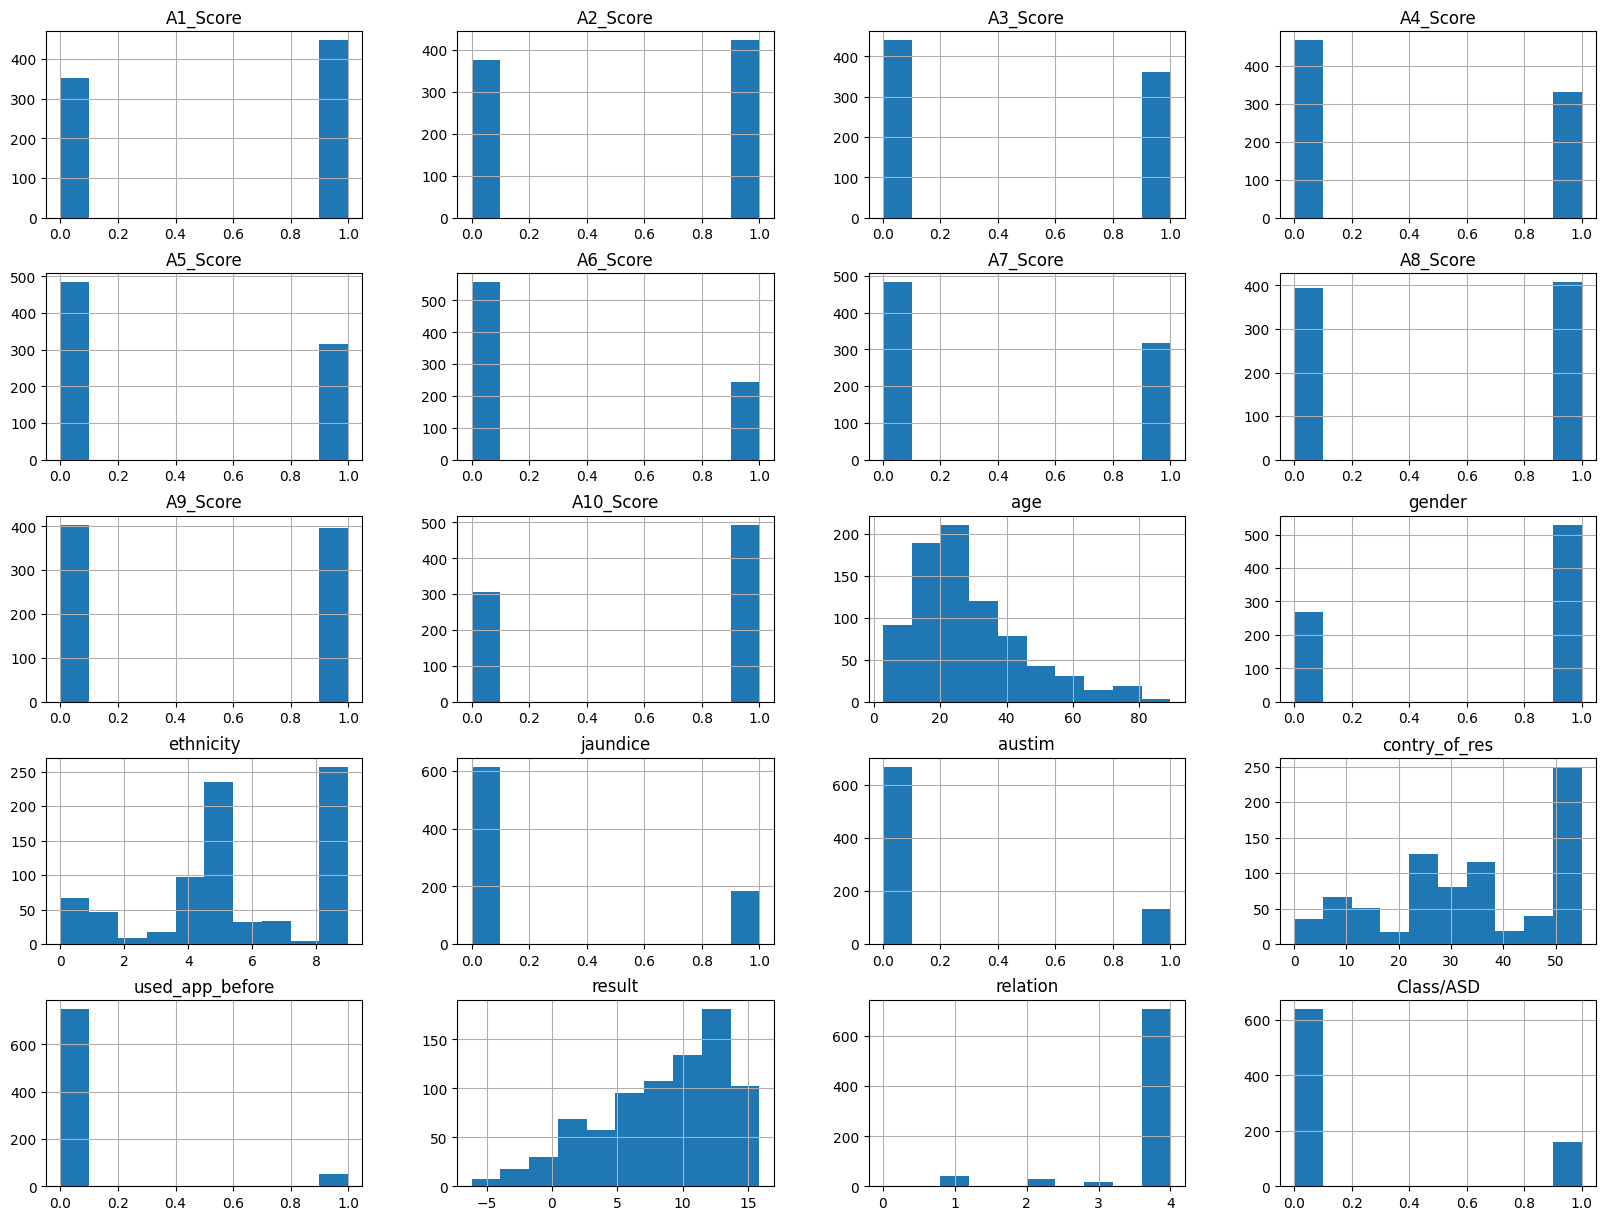

In [79]:
train.hist(figsize=(20,15))

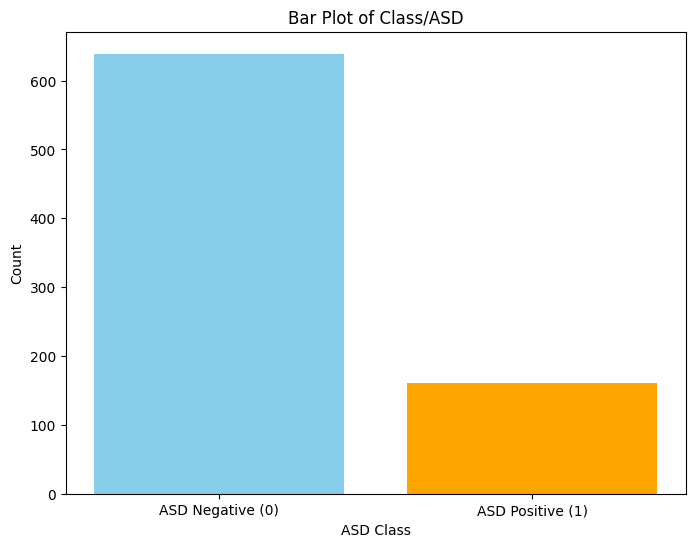

In [80]:
# Plotting bar plot for Class/ASD to deduce the ratio of Autism-No Autism people in the training dataset
# Calculate the count of 0s and 1s
counts = train['Class/ASD'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, color=['skyblue', 'orange'])
plt.title('Bar Plot of Class/ASD')
plt.xlabel('ASD Class')
plt.ylabel('Count')
plt.xticks(counts.index, labels=['ASD Negative (0)', 'ASD Positive (1)'])
plt.show()


<Axes: ylabel='Density'>

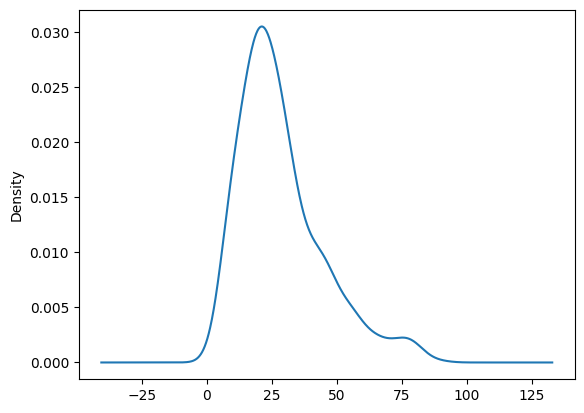

In [81]:
## Plotting the age group
train['age'].plot(kind='kde')

In [82]:
# Filter rows where Class/ASD is 1 (indicating people with autism)
asd_positive = train_copy[train_copy['Class/ASD'] == 1]

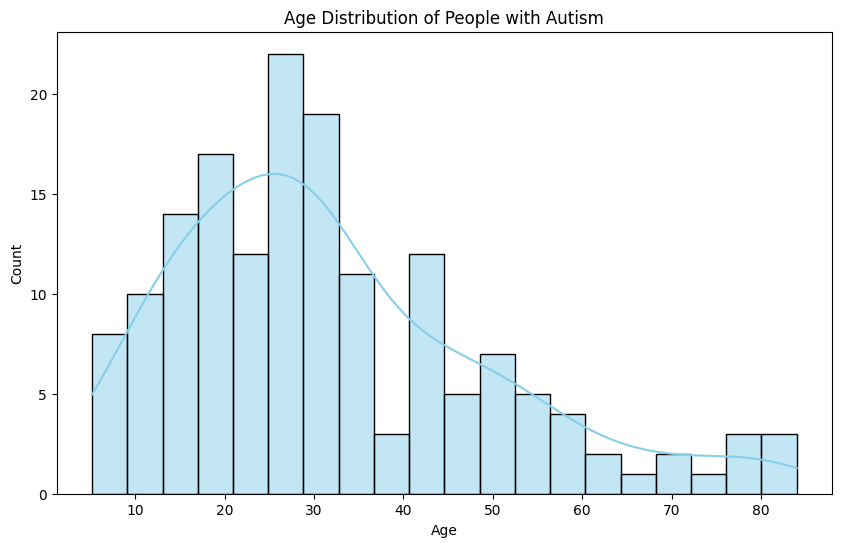

In [83]:
# Plotting age distribution for people with autism
plt.figure(figsize=(10, 6))
sns.histplot(asd_positive['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of People with Autism')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-84-1951286160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ethnicity', data=asd_positive, palette='viridis')


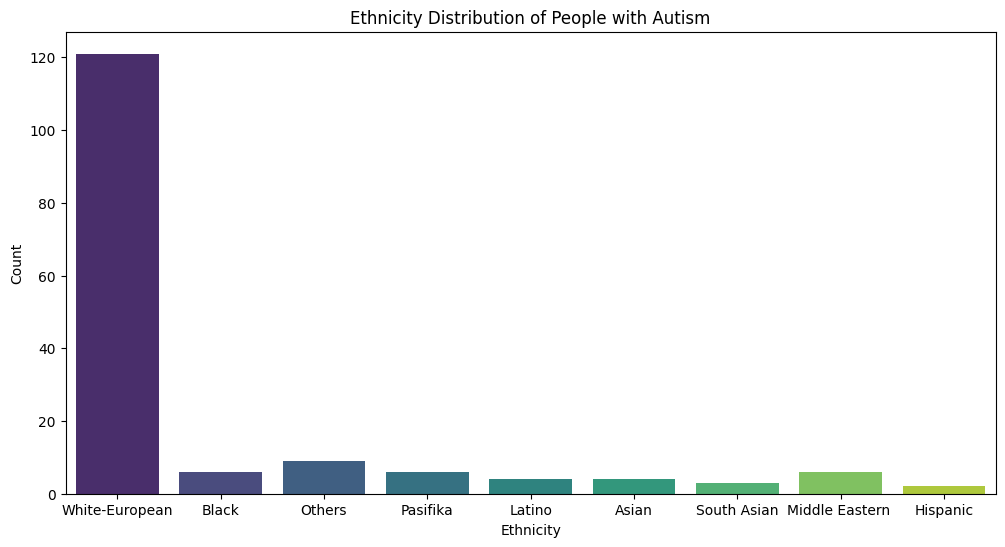

In [84]:
# Plotting ethnicity distribution for people with autism
plt.figure(figsize=(12, 6))
sns.countplot(x='ethnicity', data=asd_positive, palette='viridis')
plt.title('Ethnicity Distribution of People with Autism')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-85-9718737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=asd_positive, palette='viridis')


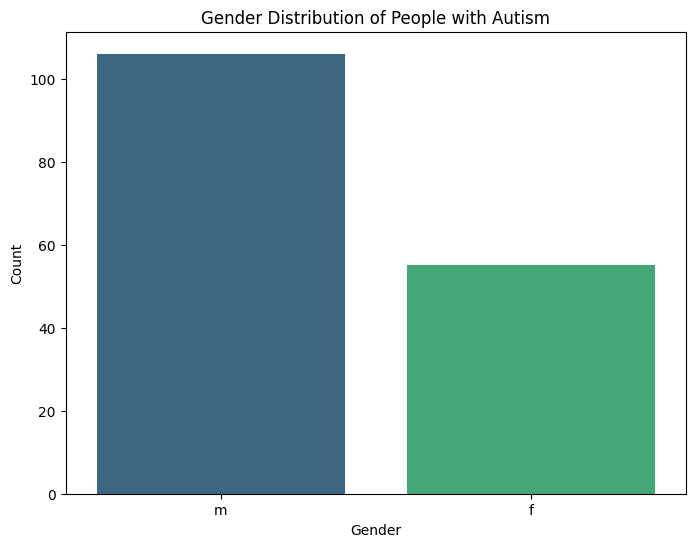

In [85]:
# Plotting gender distribution for people with autism
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=asd_positive, palette='viridis')
plt.title('Gender Distribution of People with Autism')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-86-2516434592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jaundice', data=asd_positive, palette='muted')


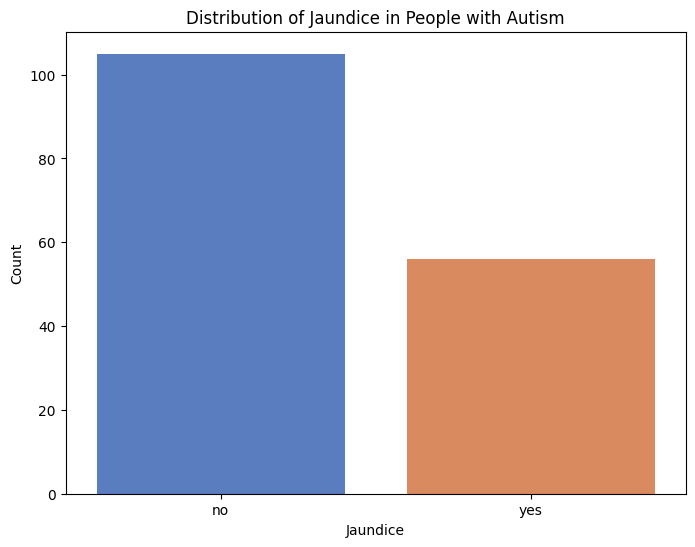

In [86]:
# Plotting jaundice distribution for people with autism
plt.figure(figsize=(8, 6))
sns.countplot(x='jaundice', data=asd_positive, palette='muted')
plt.title('Distribution of Jaundice in People with Autism')
plt.xlabel('Jaundice')
plt.ylabel('Count')
plt.show()

## Model Training

In [87]:
## Splitting the train data into X_train and y_train
X_train = train.drop('Class/ASD', axis=1)
y_train = train['Class/ASD']

In [88]:
## Importing different model classes from the scikit-learn library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier

## Two Selected Models
 - LR - logisticRegression
 - SVM - Support Vector Machine

## **1. Logistic Regression**

In [93]:
## Creating a object for the models
lr = LogisticRegression(random_state=234, max_iter=3000)
svc = SVC(random_state=567,probability=True)

In [98]:
lr.fit(X_train, y_train)
predicted = lr.predict(X_train)

**evaluation- confusion matrix**

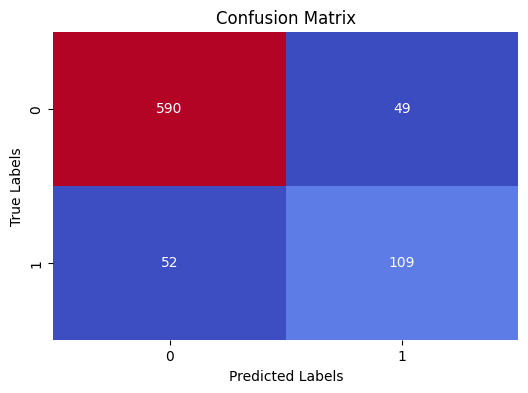

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtain the predicted labels for the train set
predicted = lr.predict(X_train)

# Create a confusion matrix
cm = confusion_matrix(y_train, predicted)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_train, predicted)

# Calculate precision
precision = precision_score(y_train, predicted)

# Calculate recall
recall = recall_score(y_train, predicted)

# Calculate F1 score
f1 = f1_score(y_train, predicted)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.874
Precision: 0.690
Recall: 0.677
F1 Score: 0.683


#2 SVM

In [101]:
svc.fit(X_train, y_train)
predicted_svm = svc.predict(X_train)

**evaluation- confusion matrix**

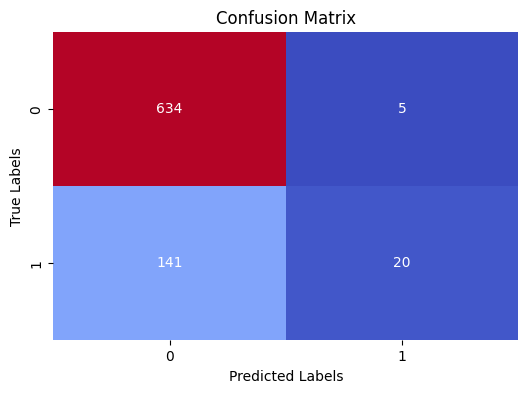

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtain the predicted labels for the train set
predicted_svm = svc.predict(X_train)

# Create a confusion matrix
cm = confusion_matrix(y_train, predicted_svm)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [103]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_train, predicted_svm)

# Calculate precision
precision = precision_score(y_train, predicted_svm)

# Calculate recall
recall = recall_score(y_train, predicted_svm)

# Calculate F1 score
f1 = f1_score(y_train, predicted_svm)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")


Accuracy: 0.818
Precision: 0.800
Recall: 0.124
F1 Score: 0.215
